In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

def date2int(date_obj):
    string = str(date_obj)
    return int("".join(string.split(" ")[0].split("-")))

def delete_zero(df):
    for i in df:
        df[i] = df[i].fillna(0)
        if (df[i] == 0).all():
            del df[i]
    return df

In [43]:
df_5_13 = pd.read_excel("./Data/cta_raw.xlsx", sheet_name="5-13")
df_10_20 = pd.read_excel("./Data/cta_raw.xlsx", sheet_name="10-20")
df_20_50 = pd.read_excel("./Data/cta_raw.xlsx", sheet_name="20-50")
df_50_100 = pd.read_excel("./Data/cta_raw.xlsx", sheet_name="50-100")

In [3]:
def PCA(x, percent=0.8):
    x_mean = x.mean(axis=1)
    x_mean.shape = (-1, 1)
    x -= x_mean
    x2 = x.T.dot(x)
    eig_val, eig_vec = np.linalg.eig(x2)

    this_percnet = 0.0
    K = 1
    while True:
        max_index = np.argpartition(eig_val, -K)[-K:]
        if sum(eig_val[max_index]) >= sum(eig_val) * percent:
            break
        else:
            K += 1
    transfer_mat = eig_vec[:, max_index]
    x3 = x.dot(transfer_mat)
    return x3, transfer_mat

In [6]:
df = df_5_13.copy()
df = delete_zero(df)
df.iloc[:, 1:] = df.iloc[:, 1:] / 1e7
x = df.iloc[:, 1:].values

In [7]:
x2 = x.cumsum(0)

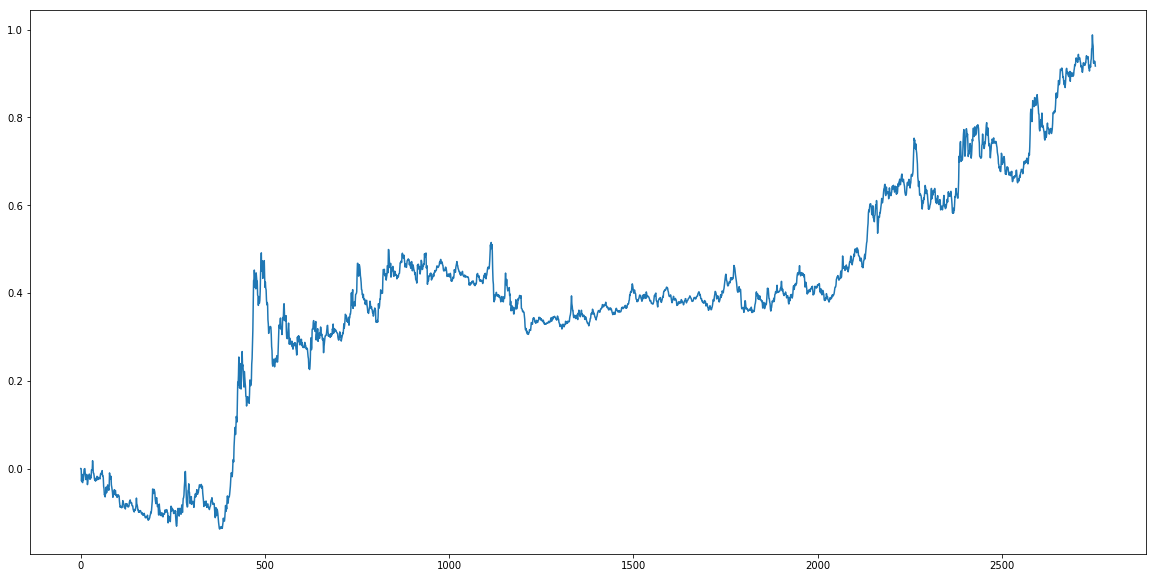

In [23]:
fig = plt.figure(figsize=(20, 10))
plt.plot(x2[:, 0])

In [24]:
x3, _ = PCA(x)

In [25]:
x4 = x3.cumsum(0)

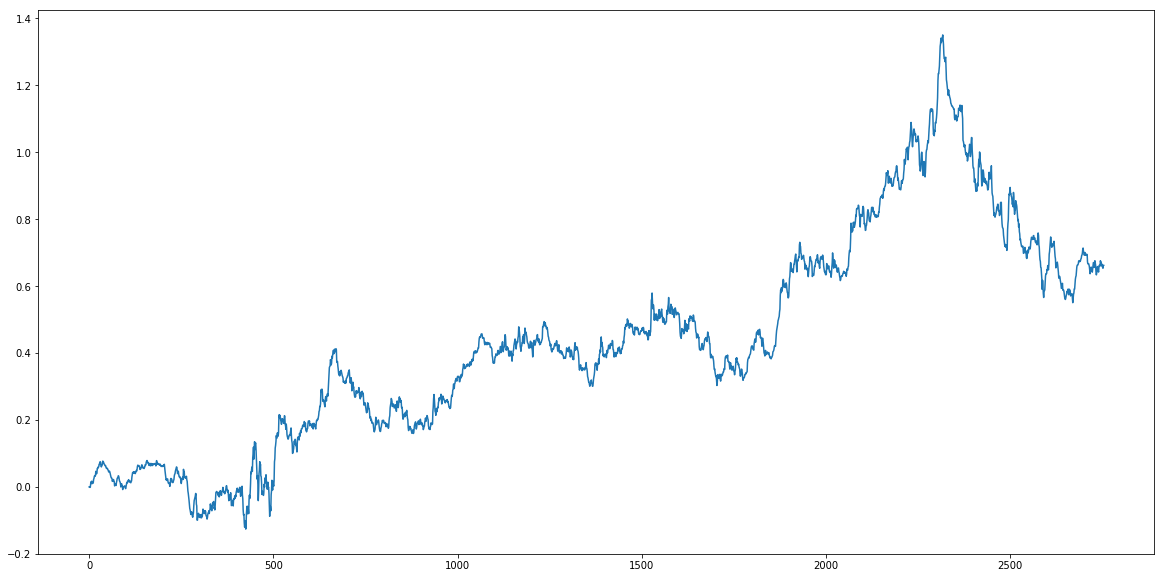

In [42]:
fig = plt.figure(figsize=(20, 10))
plt.plot(x4[:, 6])

In this case, we need to construct several factors, ranging from industry factors, to style factors.  
Then we need to estimate their expected returns and covariance matrix.  
So the question is whether stationary of the expected return is required.

# define industry factors
from WindPy import *
import pandas as pd

w.start()

def getWind(tickers, fields, start_date, end_date):
    data = w.wsd(tickers, fields, start_date, end_date)
    return pd.DataFrame(data=data.Data, index=data.Codes, columns=data.Times).T